# 회고
  - lms 노드 복사/붙여넣기 하여 실행 
    - 특별히 내가 한 부분이 없기 때문에 절차나 결과 부분 생략
    - 파일만 지정한 정도
    - 노드도 과제도 아주 하기 싫은 한 주였음
    - gif 파일은 감히 엄두도 못내고 끝맺음
    
  - 여유가 되면 하고 싶었던 것은 있음
    - 아웃포커싱의 반대로 해보고 싶었음
      - 인물이 선명하고 배경이 흐린 화면
      - 인물이 선명하고 배경이 선명하게 나올 수 있을까?
    - 움직이는 물체에 대한 이미지 
      - 카메라 조리개를 열어뒀을 때 : 움직임이 보이는 사진
      - 움직이는 물체나 인물도 선명하게 나타낼 수 있을까?
    - 하고 싶었던 부분은 다음에 도전해볼 생각
    
  - exploration 막바지에 이르러 이렇게 하기 싫어지는 것인지...
    - 다음 한 주, 과제 4개가 남은 상태인데
    - 끝까지 최선을 다해야 되는데...
    
  - 많이 부족하지만 이렇게 과제 제출할 예정
    - 정성스레 노드 작성한 분께 죄송함

In [5]:
import tensorflow_datasets as tfds

(1280, 1920, 3)


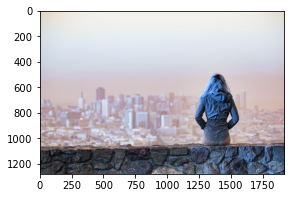

In [8]:
import cv2
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
import os

img_path = os.getenv('HOME')+'/work/project/pro_16_superResolution/data/blonde-1867768_1920.jpg'  # 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요. 
#img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/person-822803_640.jpg'  # 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요. 
hr_image = cv2.imread(img_path)
hr_shape = hr_image.shape[:2]

print(hr_image.shape) # 이미지의 크기를 출력합니다.

plt.figure(figsize=(6,3))
plt.imshow(hr_image)

(100, 150, 3)


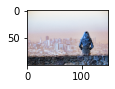

In [9]:
lr_image = cv2.resize(img_orig, dsize=(150,100)) # (가로 픽셀 수, 세로 픽셀 수)

print(lr_image.shape)

plt.figure(figsize=(3,1))
plt.imshow(lr_image)

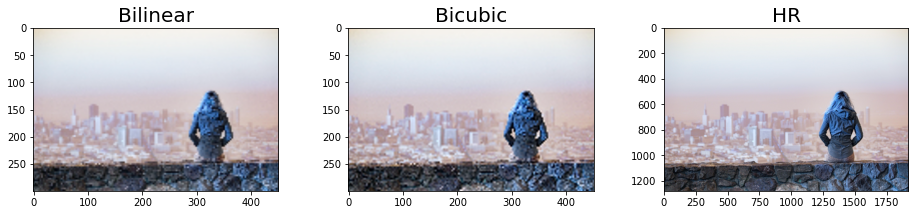

In [10]:
bilinear_image = cv2.resize(
    lr_image, 
    dsize=(451, 300), # (가로 픽셀 수, 세로 픽셀 수) 
    interpolation=cv2.INTER_LINEAR # bilinear interpolation 적용
)

bicubic_image = cv2.resize(
    lr_image, 
    dsize=(451, 300), # (가로 픽셀 수, 세로 픽셀 수)
    interpolation=cv2.INTER_CUBIC # bicubic interpolation 적용
)

images = [bilinear_image, bicubic_image, hr_image]
titles = ["Bilinear", "Bicubic", "HR"]

plt.figure(figsize=(16,3))
for i, (image, title) in enumerate(zip(images, titles)):
    plt.subplot(1,3,i+1)
    plt.imshow(image)
    plt.title(title, fontsize=20)

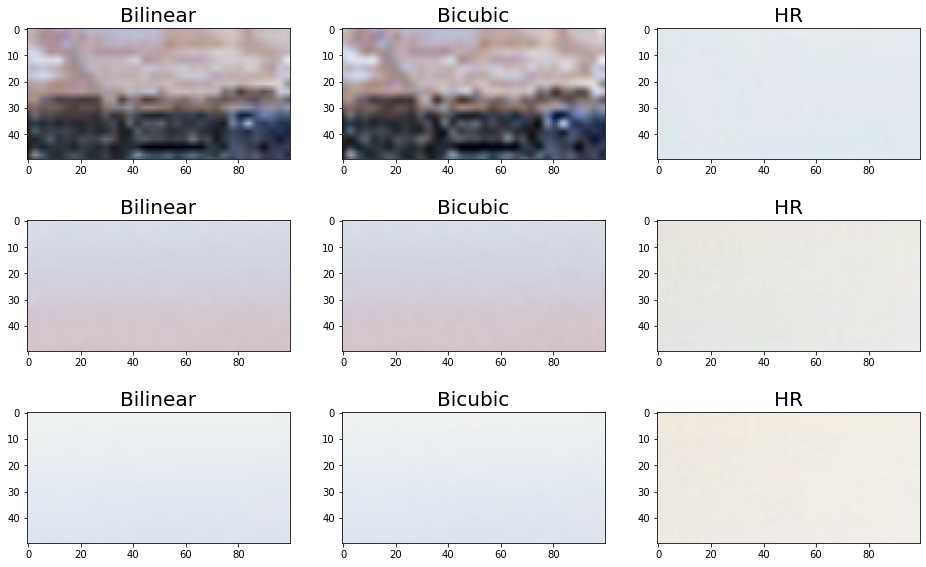

In [11]:
# 특정 영역을 잘라낼 함수를 정의합니다.
def crop(image, left_top, x=50, y=100):
    return image[left_top[0]:(left_top[0]+x), left_top[1]:(left_top[1]+y), :]


# 잘라낼 영역의 좌표를 정의합니다.
left_tops = [(220,200)] *3 + [(90,120)] *3 + [(30,200)] *3

plt.figure(figsize=(16,10))
for i, (image, left_top, title) in enumerate(zip(images*3, left_tops, titles*3)):
    plt.subplot(3,3,i+1)
    plt.imshow(crop(image, left_top))
    plt.title(title, fontsize=20)

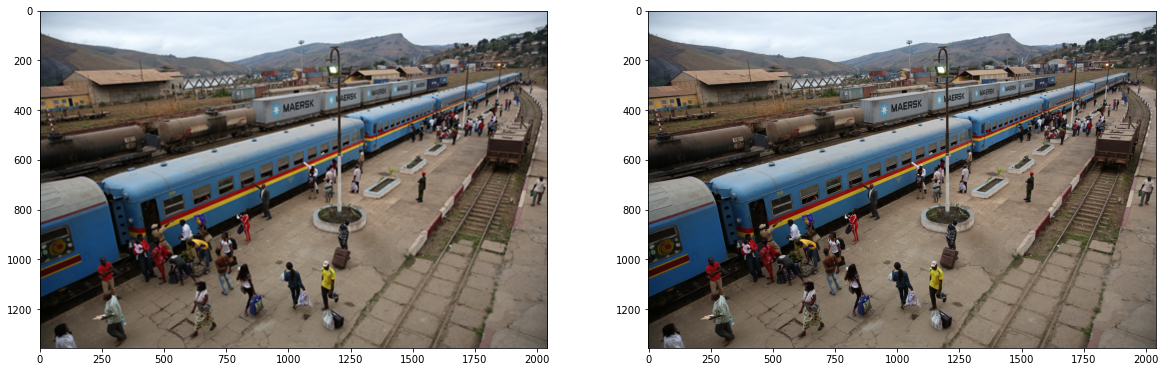

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

# 데이터를 불러옵니다.
train, valid = tfds.load(
    "div2k/bicubic_x4", 
    split=["train","validation"],
    as_supervised=True
)

# 시각화를 위해 한 개의 데이터만 선택합니다.
for i, (lr, hr) in enumerate(valid):
    if i == 37: break
    
# 저해상도 이미지를 고해상도 이미지 크기로 bicubic interpolation 합니다.  
hr, lr = np.array(hr), np.array(lr)
bicubic_hr = cv2.resize(
    lr,
    dsize=(hr.shape[1], hr.shape[0]), # 고해상도 이미지 크기로 설정
    interpolation=cv2.INTER_CUBIC # bicubic 설정
)

# 저해상도 및 고해상도 이미지를 시각화합니다.
plt.figure(figsize=(20,10))
plt.subplot(1,2,1); plt.imshow(bicubic_hr)
plt.subplot(1,2,2); plt.imshow(hr)

Text(0.5, 1.0, 'HR')

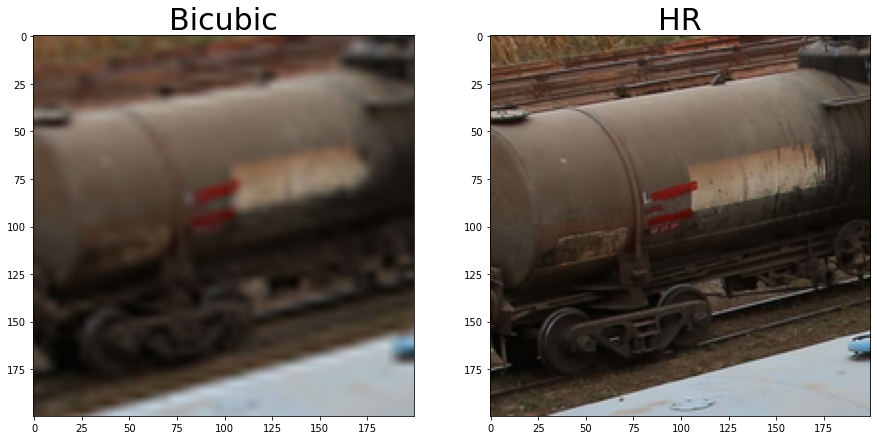

In [17]:
# 이미지의 특정 부분을 잘라내는 함수를 정의합니다.
def crop(image, left_top, x=200, y=200):
    return image[left_top[0]:(left_top[0]+x), left_top[1]:(left_top[1]+y), :]

# interpolation된 이미지와 고해상도 이미지의 동일한 부분을 각각 잘라냅니다.
left_top = (400, 500)
crop_bicubic_hr = crop(bicubic_hr, left_top)
crop_hr = crop(hr, left_top)

# 잘라낸 부분을 시각화 합니다.
plt.figure(figsize=(15,25))
plt.subplot(1,2,1); plt.imshow(crop_bicubic_hr); plt.title("Bicubic", fontsize=30)
plt.subplot(1,2,2); plt.imshow(crop_hr); plt.title("HR", fontsize=30)

In [18]:
import tensorflow as tf

def preprocessing(lr, hr):
    # 이미지의 크기가 크므로 (96,96,3) 크기로 임의 영역을 잘라내어 사용합니다.
    hr = tf.image.random_crop(hr, size=[96, 96, 3])
    hr = tf.cast(hr, tf.float32) / 255.
    
    # 잘라낸 고해상도 이미지의 가로, 세로 픽셀 수를 1/4배로 줄였다가
    # interpolation을 이용해 다시 원래 크기로 되돌립니다.
    # 이렇게 만든 저해상도 이미지를 입력으로 사용합니다.
    lr = tf.image.resize(hr, [96//4, 96//4], "bicubic")
    lr = tf.image.resize(lr, [96, 96], "bicubic")
    return lr, hr

train = train.map(preprocessing).shuffle(buffer_size=10).batch(16)
valid = valid.map(preprocessing).batch(16)


In [19]:
from tensorflow.keras import layers, Sequential

# 3개의 convolutional layer를 갖는 Sequential 모델을 구성합니다.
srcnn = Sequential()
# 9x9 크기의 필터를 128개 사용합니다.
srcnn.add(layers.Conv2D(128, 9, padding="same", input_shape=(None, None, 3)))
srcnn.add(layers.ReLU())
# 5x5 크기의 필터를 64개 사용합니다.
srcnn.add(layers.Conv2D(64, 5, padding="same"))
srcnn.add(layers.ReLU())
# 5x5 크기의 필터를 64개 사용합니다.
srcnn.add(layers.Conv2D(3, 5, padding="same"))

srcnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, None, None, 128)   31232     
_________________________________________________________________
re_lu (ReLU)                 (None, None, None, 128)   0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 64)    204864    
_________________________________________________________________
re_lu_1 (ReLU)               (None, None, None, 64)    0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 3)     4803      
Total params: 240,899
Trainable params: 240,899
Non-trainable params: 0
_________________________________________________________________


In [20]:
srcnn.compile(
    optimizer="adam", 
    loss="mse"
)

srcnn.fit(train, validation_data=valid, epochs=20)

Epoch 1/20
50/50 [==============================] - 16s 313ms/step - loss: 0.0187 - val_loss: 0.0072
Epoch 2/20
50/50 [==============================] - 11s 215ms/step - loss: 0.0071 - val_loss: 0.0057
Epoch 3/20
50/50 [==============================] - 11s 215ms/step - loss: 0.0050 - val_loss: 0.0050
Epoch 4/20
50/50 [==============================] - 11s 211ms/step - loss: 0.0046 - val_loss: 0.0060
Epoch 5/20
50/50 [==============================] - 10s 205ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 6/20
50/50 [==============================] - 10s 209ms/step - loss: 0.0043 - val_loss: 0.0052
Epoch 7/20
50/50 [==============================] - 11s 218ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 8/20
50/50 [==============================] - 10s 208ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 9/20
50/50 [==============================] - 11s 218ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 10/20
50/50 [==============================] - 11s 216ms/step - loss: 0.0046 - val_lo

In [21]:
import tensorflow as tf
import os

model_file = os.getenv('HOME')+'/aiffel/super_resolution/srcnn.h5'
srcnn = tf.keras.models.load_model(model_file)

In [22]:
def apply_srcnn(image):
    sr = srcnn.predict(image[np.newaxis, ...]/255.)
    sr[sr > 1] = 1
    sr[sr < 0] = 0
    sr *= 255.
    return np.array(sr[0].astype(np.uint8))

srcnn_hr = apply_srcnn(bicubic_hr)

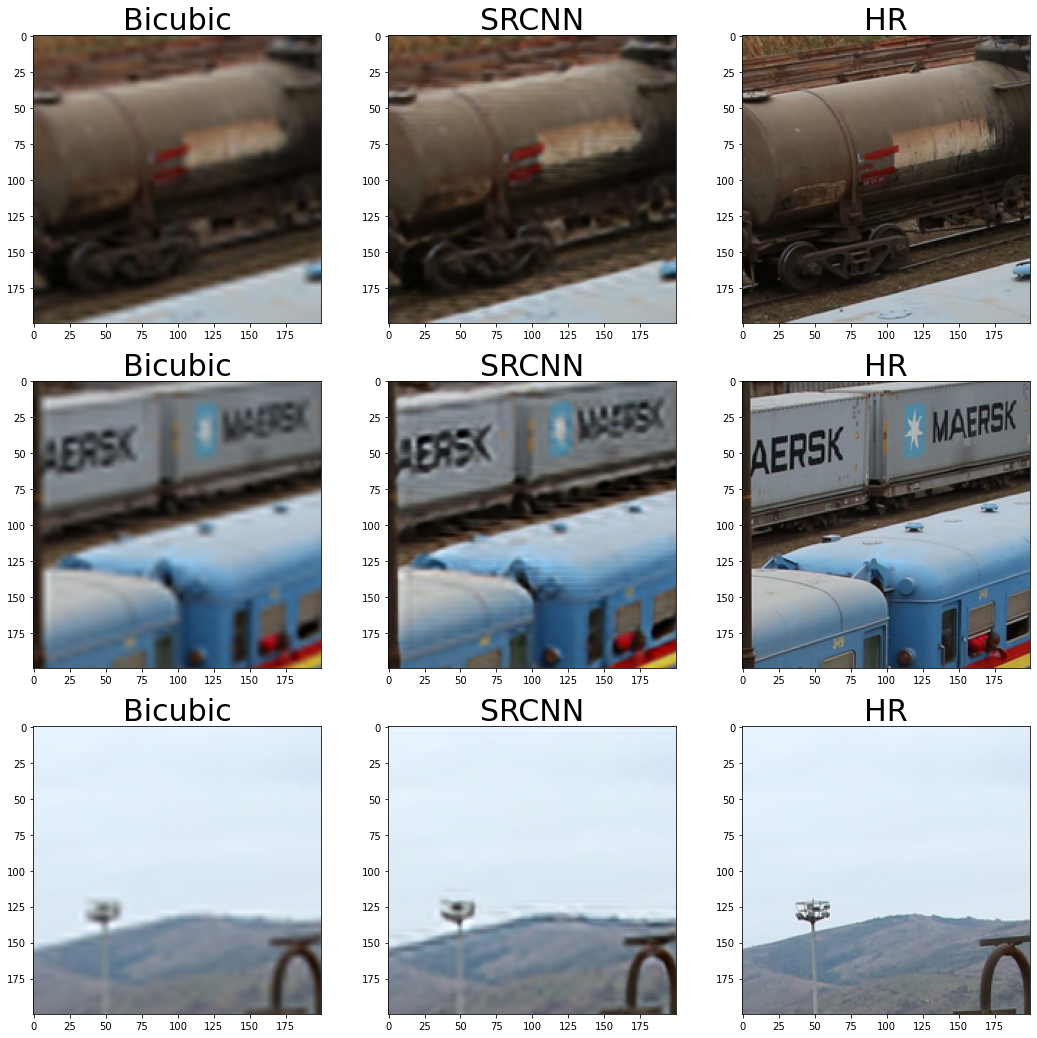

In [23]:
# 자세히 시각화 하기 위해 3개 영역을 잘라냅니다.
# 아래는 잘라낸 부분의 좌상단 좌표 3개 입니다.
left_tops = [(400,500), (300,1200), (0,1000)]

images = []
for left_top in left_tops:
    img1 = crop(bicubic_hr, left_top, 200, 200)
    img2 = crop(srcnn_hr , left_top, 200, 200)
    img3 = crop(hr, left_top, 200, 200)
    images.extend([img1, img2, img3])

labels = ["Bicubic", "SRCNN", "HR"] * 3

plt.figure(figsize=(18,18))
for i in range(9):
    plt.subplot(3,3,i+1) 
    plt.imshow(images[i])
    plt.title(labels[i], fontsize=30)

In [24]:
train, valid = tfds.load(
    "div2k/bicubic_x4", 
    split=["train","validation"],
    as_supervised=True
)
def preprocessing(lr, hr):
    hr = tf.cast(hr, tf.float32) /255.
        
    # 이미지의 크기가 크므로 (96,96,3) 크기로 임의 영역을 잘라내어 사용합니다.
    hr_patch = tf.image.random_crop(hr, size=[96,96,3])
        
    # 잘라낸 고해상도 이미지의 가로, 세로 픽셀 수를 1/4배로 줄입니다
    # 이렇게 만든 저해상도 이미지를 SRGAN의 입력으로 사용합니다.
    lr_patch = tf.image.resize(hr_patch, [96//4, 96//4], "bicubic")
    return lr_patch, hr_patch

train = train.map(preprocessing).shuffle(buffer_size=10).repeat().batch(8)
valid = valid.map(preprocessing).repeat().batch(8)

In [25]:
from tensorflow.keras import Input, Model

# 그림의 파란색 블록을 정의합니다.
def gene_base_block(x):
    out = layers.Conv2D(64, 3, 1, "same")(x)
    out = layers.BatchNormalization()(out)
    out = layers.PReLU(shared_axes=[1,2])(out)
    out = layers.Conv2D(64, 3, 1, "same")(out)
    out = layers.BatchNormalization()(out)
    return layers.Add()([x, out])

# 그림의 뒤쪽 연두색 블록을 정의합니다.
def upsample_block(x):
    out = layers.Conv2D(256, 3, 1, "same")(x)
    # 그림의 PixelShuffler 라고 쓰여진 부분을 아래와 같이 구현합니다.
    out = layers.Lambda(lambda x: tf.nn.depth_to_space(x, 2))(out)
    return layers.PReLU(shared_axes=[1,2])(out)
    
# 전체 Generator를 정의합니다.
def get_generator(input_shape=(None, None, 3)):
    inputs = Input(input_shape)
    
    out = layers.Conv2D(64, 9, 1, "same")(inputs)
    out = residual = layers.PReLU(shared_axes=[1,2])(out)
    
    for _ in range(5):
        out = gene_base_block(out)
    
    out = layers.Conv2D(64, 3, 1, "same")(out)
    out = layers.BatchNormalization()(out)
    out = layers.Add()([residual, out])
    
    for _ in range(2):
        out = upsample_block(out)
        
    out = layers.Conv2D(3, 9, 1, "same", activation="tanh")(out)
    return Model(inputs, out)


In [27]:
# 그림의 파란색 블록을 정의합니다.
def disc_base_block(x, n_filters=128):
    out = layers.Conv2D(n_filters, 3, 1, "same")(x)
    out = layers.BatchNormalization()(out)
    out = layers.LeakyReLU()(out)
    out = layers.Conv2D(n_filters, 3, 2, "same")(out)
    out = layers.BatchNormalization()(out)
    return layers.LeakyReLU()(out)

# 전체 Discriminator 정의합니다.
def get_discriminator(input_shape=(None, None, 3)):
    inputs = Input(input_shape)
    
    out = layers.Conv2D(64, 3, 1, "same")(inputs)
    out = layers.LeakyReLU()(out)
    out = layers.Conv2D(64, 3, 2, "same")(out)
    out = layers.BatchNormalization()(out)
    out = layers.LeakyReLU()(out)
    
    for n_filters in [128, 256, 512]:
        out = disc_base_block(out, n_filters)
    
    out = layers.Dense(1024)(out)
    out = layers.LeakyReLU()(out)
    out = layers.Dense(1, activation="sigmoid")(out)
    return Model(inputs, out)


In [28]:
from tensorflow.python.keras import applications
def get_feature_extractor(input_shape=(None, None, 3)):
    vgg = applications.vgg19.VGG19(
        include_top=False, 
        weights="imagenet", 
        input_shape=input_shape
    )
    # 아래 vgg.layers[20]은 vgg 내의 마지막 convolutional layer 입니다.
    return Model(vgg.input, vgg.layers[20].output)


In [29]:
from tensorflow.keras import losses, metrics, optimizers

generator = get_generator()
discriminator = get_discriminator()
vgg = get_feature_extractor()

# 사용할 loss function 및 optimizer 를 정의합니다.
bce = losses.BinaryCrossentropy(from_logits=False)
mse = losses.MeanSquaredError()
gene_opt = optimizers.Adam()
disc_opt = optimizers.Adam()

def get_gene_loss(fake_out):
    return bce(tf.ones_like(fake_out), fake_out)

def get_disc_loss(real_out, fake_out):
    return bce(tf.ones_like(real_out), real_out) + bce(tf.zeros_like(fake_out), fake_out)


@tf.function
def get_content_loss(hr_real, hr_fake):
    hr_real = applications.vgg19.preprocess_input(hr_real)
    hr_fake = applications.vgg19.preprocess_input(hr_fake)
    
    hr_real_feature = vgg(hr_real) / 12.75
    hr_fake_feature = vgg(hr_fake) / 12.75
    return mse(hr_real_feature, hr_fake_feature)


@tf.function
def step(lr, hr_real):
    with tf.GradientTape() as gene_tape, tf.GradientTape() as disc_tape:
        hr_fake = generator(lr, training=True)
        
        real_out = discriminator(hr_real, training=True)
        fake_out = discriminator(hr_fake, training=True)
        
        perceptual_loss = get_content_loss(hr_real, hr_fake) + 1e-3 * get_gene_loss(fake_out)
        discriminator_loss = get_disc_loss(real_out, fake_out)
        
    gene_gradient = gene_tape.gradient(perceptual_loss, generator.trainable_variables)
    disc_gradient = disc_tape.gradient(discriminator_loss, discriminator.trainable_variables)
    
    gene_opt.apply_gradients(zip(gene_gradient, generator.trainable_variables))
    disc_opt.apply_gradients(zip(disc_gradient, discriminator.trainable_variables))
    return perceptual_loss, discriminator_loss


gene_losses = metrics.Mean()
disc_losses = metrics.Mean()

for epoch in range(1, 2):
    for i, (lr, hr) in enumerate(train):
        g_loss, d_loss = step(lr, hr)
        
        gene_losses.update_state(g_loss)
        disc_losses.update_state(d_loss)
        
        # 10회 반복마다 loss를 출력합니다.
        if (i+1) % 10 == 0:
            print(f"EPOCH[{epoch}] - STEP[{i+1}] \nGenerator_loss:{gene_losses.result():.4f} \nDiscriminator_loss:{disc_losses.result():.4f}", end="\n\n")
        
        if (i+1) == 200:
            break
            
    gene_losses.reset_states()
    disc_losses.reset_states()

EPOCH[1] - STEP[10] 
Generator_loss:0.0012 
Discriminator_loss:1.6202

EPOCH[1] - STEP[20] 
Generator_loss:0.0017 
Discriminator_loss:1.0363

EPOCH[1] - STEP[30] 
Generator_loss:0.0022 
Discriminator_loss:0.7318

EPOCH[1] - STEP[40] 
Generator_loss:0.0027 
Discriminator_loss:0.5615

EPOCH[1] - STEP[50] 
Generator_loss:0.0033 
Discriminator_loss:0.4527

EPOCH[1] - STEP[60] 
Generator_loss:0.0037 
Discriminator_loss:0.3876

EPOCH[1] - STEP[70] 
Generator_loss:0.0040 
Discriminator_loss:0.3357

EPOCH[1] - STEP[80] 
Generator_loss:0.0042 
Discriminator_loss:0.2948

EPOCH[1] - STEP[90] 
Generator_loss:0.0045 
Discriminator_loss:0.2624

EPOCH[1] - STEP[100] 
Generator_loss:0.0048 
Discriminator_loss:0.2364

EPOCH[1] - STEP[110] 
Generator_loss:0.0051 
Discriminator_loss:0.2150

EPOCH[1] - STEP[120] 
Generator_loss:0.0054 
Discriminator_loss:0.1972

EPOCH[1] - STEP[130] 
Generator_loss:0.0056 
Discriminator_loss:0.1821

EPOCH[1] - STEP[140] 
Generator_loss:0.0058 
Discriminator_loss:0.1691

E

In [30]:
import tensorflow as tf
import os

model_file = os.getenv('HOME')+'/aiffel/super_resolution/srgan_G.h5'
srgan = tf.keras.models.load_model(model_file)

In [33]:
def apply_srgan(image):
    image = tf.cast(image[np.newaxis, ...], tf.float32)
    sr = srgan.predict(image)
    sr = tf.clip_by_value(sr, 0, 255)
    sr = tf.round(sr)
    sr = tf.cast(sr, tf.uint8)
    return np.array(sr)[0]

train, valid = tfds.load(
    "div2k/bicubic_x4", 
    split=["train","validation"],
    as_supervised=True
)

for i, (lr, hr) in enumerate(valid):
    if i == 37: break

srgan_hr = apply_srgan(lr)


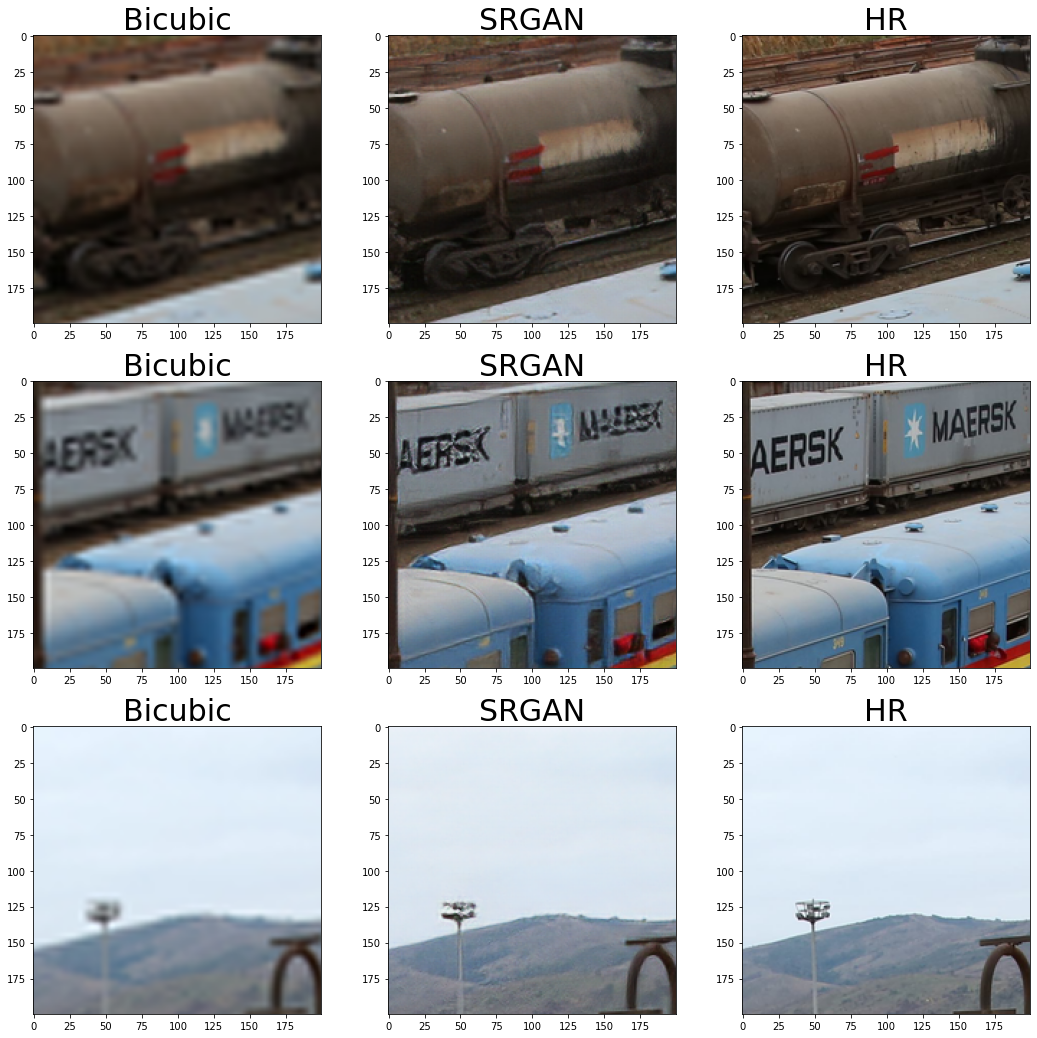

In [34]:
# 자세히 시각화 하기 위해 3개 영역을 잘라냅니다.
# 아래는 잘라낸 부분의 좌상단 좌표 3개 입니다.
left_tops = [(400,500), (300,1200), (0,1000)]

images = []
for left_top in left_tops:
    img1 = crop(bicubic_hr, left_top, 200, 200)
    img2 = crop(srgan_hr , left_top, 200, 200)
    img3 = crop(hr, left_top, 200, 200)
    images.extend([img1, img2, img3])

labels = ["Bicubic", "SRGAN", "HR"] * 3

plt.figure(figsize=(18,18))
for i in range(9):
    plt.subplot(3,3,i+1) 
    plt.imshow(images[i])
    plt.title(labels[i], fontsize=30)

(1280, 1920, 3)


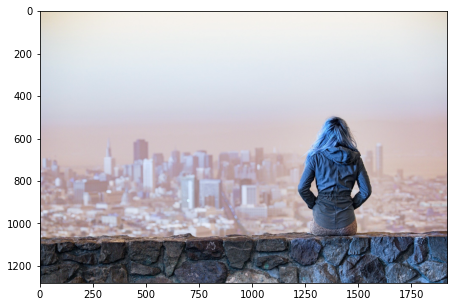

In [35]:
from skimage import data
import matplotlib.pyplot as plt

img_path = os.getenv('HOME')+'/work/project/pro_16_superResolution/data/blonde-1867768_1920.jpg'  # 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요. 
#img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/person-822803_640.jpg'  # 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요. 
hr_image = cv2.imread(img_path)
hr_shape = hr_image.shape[:2]


print(hr_image.shape) # 이미지의 크기를 출력합니다.

plt.figure(figsize=(8,5))
plt.imshow(hr_image)

In [37]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

print("**동일 이미지 비교**")
print("PSNR :", peak_signal_noise_ratio(hr_image, hr_image))
print("SSIM :", structural_similarity(hr_image, hr_image, multichannel=True))

**동일 이미지 비교**
PSNR : inf


/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/skimage/metrics/simple_metrics.py:160: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)


SSIM : 1.0


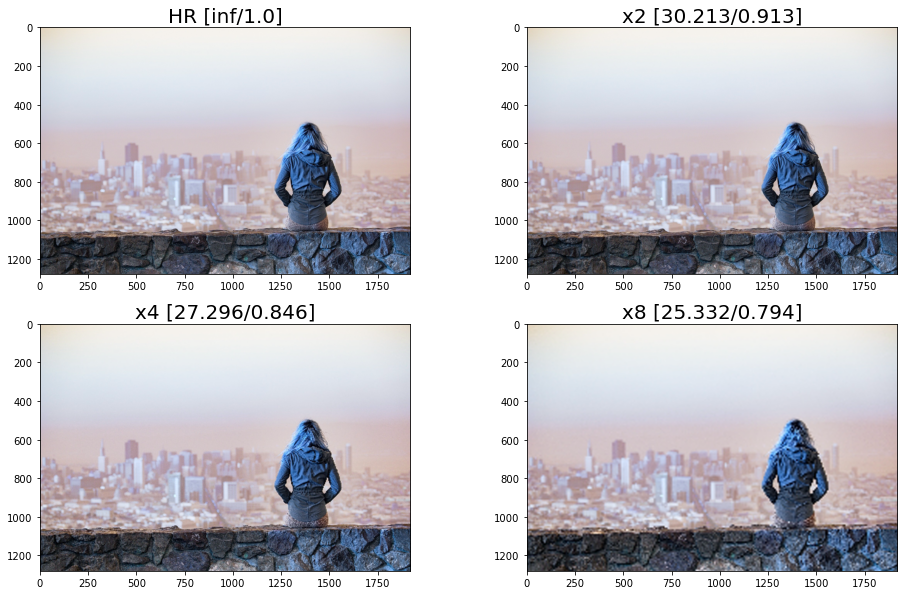

In [38]:
import cv2

# 이미지를 특정 크기로 줄이고 다시 늘리는 과정을 함수로 정의합니다.
def interpolation_xn(image, n):
    downsample = cv2.resize(
        image,
        dsize=(hr_shape[1]//n, hr_shape[0]//n)
    )
    upsample = cv2.resize(
        downsample,
        dsize=(hr_shape[1], hr_shape[0]),
        interpolation=cv2.INTER_CUBIC
    )
    return upsample

lr2_image = interpolation_xn(hr_image, 2) # 1/2로 줄이고 다시 복원
lr4_image = interpolation_xn(hr_image, 4) # 1/4로 줄이고 다시 복원
lr8_image = interpolation_xn(hr_image, 8) # 1/8로 줄이고 다시 복원

images = [hr_image, lr2_image, lr4_image, lr8_image]
titles = ["HR", "x2", "x4", "x8"]

# 각 이미지에 대해 PSNR을 계산하고 반올림합니다.
psnr = [round(peak_signal_noise_ratio(hr_image, i), 3) for i in images]
# 각 이미지에 대해 SSIM을 계산하고 반올림합니다.
ssim = [round(structural_similarity(hr_image, i, multichannel=True), 3) for i in images]

# 이미지 제목에 PSNR과 SSIM을 포함하여 시각화 합니다. 
plt.figure(figsize=(16,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i])
    plt.title(titles[i] + f" [{psnr[i]}/{ssim[i]}]", fontsize=20)

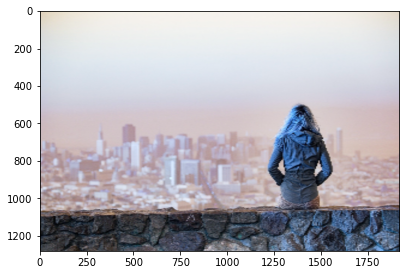

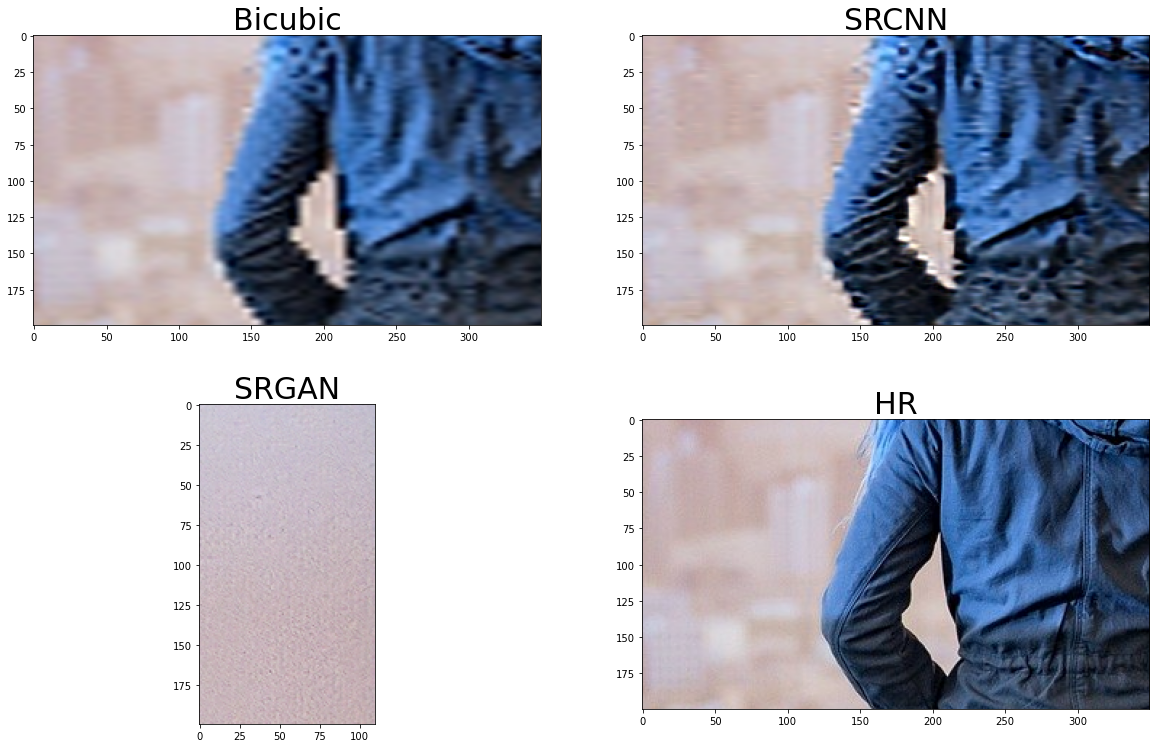

In [56]:
img_path = os.getenv('HOME')+'/work/project/pro_16_superResolution/data/blonde-1867768_1920.jpg'  # 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요. 
#img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/person-822803_640.jpg'  # 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요. 
img_orig = cv2.imread(img_path)
# hr_shape = hr_image.shape[:2]

# ------------------------------------------------------------------------------
lr = cv2.resize(img_orig, dsize=(300, 500)) # (가로 픽셀 수, 세로 픽셀 수)
# ------------------------------------------------------------------------------
# 이 부분이 오류 : 2시간이 넘도록 오류 찾음. 망했음.

lr_img, hr_img = np.array(lr), np.array(hr)

# bicubic interpolation
bicubic_img = cv2.resize(
    lr_img, 
    (hr.shape[1], hr.shape[0]), 
    interpolation=cv2.INTER_CUBIC
)

# 전체 이미지를 시각화합니다.
plt.figure(figsize=(20,15))
plt.subplot(311); plt.imshow(hr_img)

# SRCNN을 이용해 고해상도로 변환합니다.
srcnn_img = apply_srcnn(bicubic_img)

# SRGAN을 이용해 고해상도로 변환합니다.

# lr = cv2.resize(lr, dsize=(1920, 1280)) # (가로 픽셀 수, 세로 픽셀 수)
# plt.imshow(lr)

srgan_img = apply_srgan(lr_img)

images = [bicubic_img, srcnn_img, srgan_img, hr_img]
titles = ["Bicubic", "SRCNN", "SRGAN", "HR"]

left_top = (700, 1090) # 잘라낼 부분의 왼쪽 상단 좌표를 지정합니다.

# bicubic, SRCNN, SRGAN 을 적용한 이미지와 원래의 고해상도 이미지를 시각화합니다.
plt.figure(figsize=(20,20))
for i, pind in enumerate([321, 322, 323, 324]):
    plt.subplot(pind)
    plt.imshow(crop(images[i], left_top, 200, 350))
    plt.title(titles[i], fontsize=30)

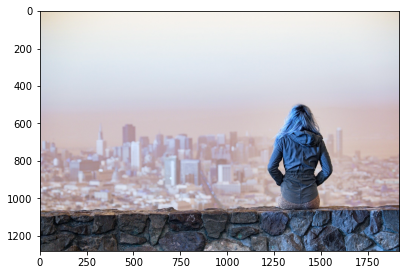

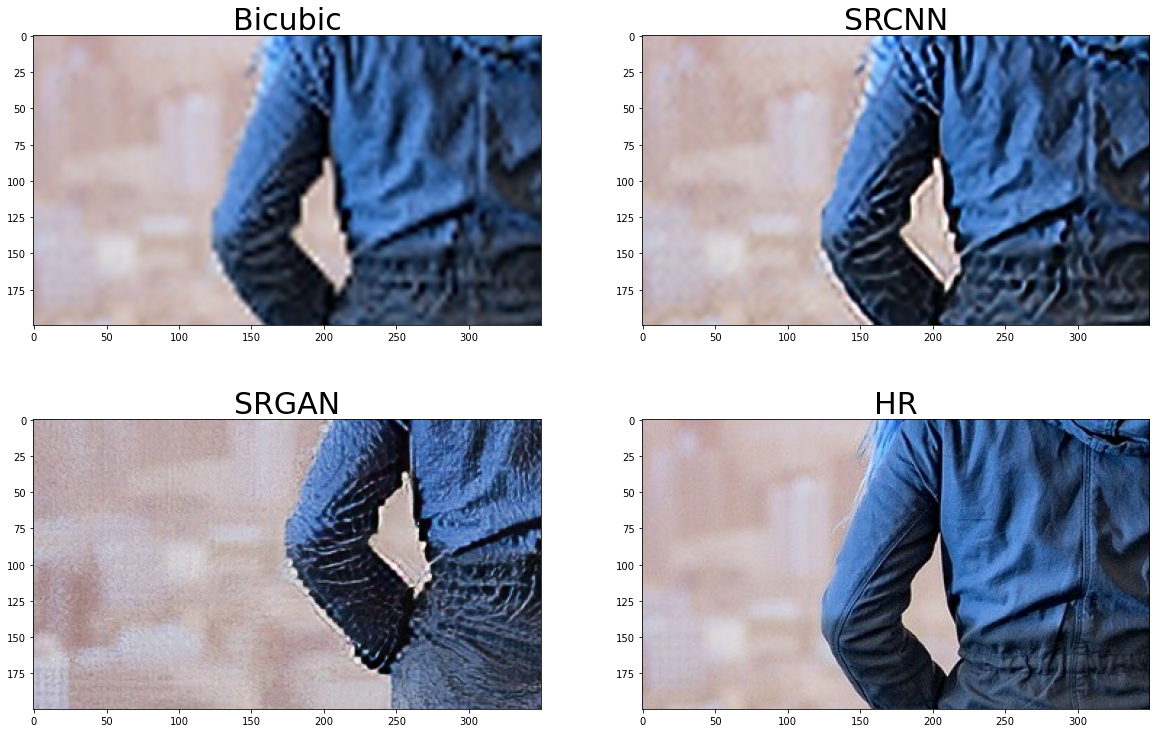

In [59]:
img_path = os.getenv('HOME')+'/work/project/pro_16_superResolution/data/blonde-1867768_1920.jpg'  # 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요. 
#img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/person-822803_640.jpg'  # 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요. 
img_orig = cv2.imread(img_path)
# hr_shape = hr_image.shape[:2]

lr = cv2.resize(img_orig, dsize=(500, 300)) # (가로 픽셀 수, 세로 픽셀 수)

lr_img, hr_img = np.array(lr), np.array(img_orig)

# bicubic interpolation
bicubic_img = cv2.resize(
    lr_img, 
    (hr.shape[1], hr.shape[0]), 
    interpolation=cv2.INTER_CUBIC
)

# 전체 이미지를 시각화합니다.
plt.figure(figsize=(20,15))
plt.subplot(311); plt.imshow(hr_img)

# SRCNN을 이용해 고해상도로 변환합니다.
srcnn_img = apply_srcnn(bicubic_img)

# SRGAN을 이용해 고해상도로 변환합니다.

# lr = cv2.resize(lr, dsize=(1920, 1280)) # (가로 픽셀 수, 세로 픽셀 수)
# plt.imshow(lr)

srgan_img = apply_srgan(lr_img)

images = [bicubic_img, srcnn_img, srgan_img, hr_img]
titles = ["Bicubic", "SRCNN", "SRGAN", "HR"]

left_top = (700, 1090) # 잘라낼 부분의 왼쪽 상단 좌표를 지정합니다.

# bicubic, SRCNN, SRGAN 을 적용한 이미지와 원래의 고해상도 이미지를 시각화합니다.
plt.figure(figsize=(20,20))
for i, pind in enumerate([321, 322, 323, 324]):
    plt.subplot(pind)
    plt.imshow(crop(images[i], left_top, 200, 350))
    plt.title(titles[i], fontsize=30)